### Objective:

Energy waste negatively impact the environment. Energy consumptions of buildings must be conserved. Most energy use in building are due to heating, ventilation and air conditioning equipments which are used to maintain a comfortable indoor climate condition. We must design energy efficient buildings. This can be done by computing for heating load and cooling load of the building. Heating load and cooling load dictate the specifications of heating and cooling equipments needed to regulate the indoor climate. Here, we predict the **cooling load** using building properties, namely, **relative compactness**, **surface area**, **wall area**, **roof area**, **overall height**, **orientation**, **glazing area**, and **glazing area distribution** using **Ridge Regression**.

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [69]:
# Fetch the energy efficiency dataset
energy_eff = fetch_ucirepo(id=242)

# Extract data in original form, features and targets
energy_eff_df = energy_eff.data.original
energy_eff_X = energy_eff.data.features 
energy_eff_y = energy_eff.data.targets 

# Show metadata 
energy_eff_metadata = energy_eff.metadata
for key, value in energy_eff_metadata.items():
    print(f"{key} : {value}")

# Show variable information
energy_eff_variables = energy_eff.variables
display(energy_eff_variables)

uci_id : 242
name : Energy Efficiency
repository_url : https://archive.ics.uci.edu/dataset/242/energy+efficiency
data_url : https://archive.ics.uci.edu/static/public/242/data.csv
abstract : This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.
area : Computer Science
tasks : ['Classification', 'Regression']
characteristics : ['Multivariate']
num_instances : 768
num_features : 8
feature_types : ['Integer', 'Real']
demographics : []
target_col : ['Y1', 'Y2']
index_col : None
has_missing_values : no
missing_values_symbol : None
year_of_dataset_creation : 2012
last_updated : Mon Feb 26 2024
dataset_doi : 10.24432/C51307
creators : ['Athanasios Tsanas', 'Angeliki Xifara']
intro_paper : {'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', 'authors': 'A. Tsanas, Angeliki Xifara', 'published_in': 'Energy and B

,name,role,type,demographic,description,units,missing_values
0,X1,Feature,Continuous,None,Relative Compactness,None,no
1,X2,Feature,Continuous,None,Surface Area,None,no
2,X3,Feature,Continuous,None,Wall Area,None,no
3,X4,Feature,Continuous,None,Roof Area,None,no
4,X5,Feature,Continuous,None,Overall Height,None,no
5,X6,Feature,Integer,None,Orientation,None,no
6,X7,Feature,Continuous,None,Glazing Area,None,no
7,X8,Feature,Integer,None,Glazing Area Distribution,None,no
8,Y1,Target,Continuous,None,Heating Load,None,no
9,Y2,Target,Continuous,None,Cooling Load,None,no


In [70]:
# Check info
energy_eff_df.info()
energy_eff_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [71]:
# Check for missing values and duplicates

energy_eff_null = energy_eff_df.isnull().sum()
print(f"Number of missing values in dataframe: {energy_eff_null.sum()}")

energy_eff_dups = energy_eff_df.duplicated().sum()
print(f"Number of duplicate rows in dataframe: {energy_eff_dups}")

# Check for unique values in each column

energy_eff_columns = energy_eff_df.columns
print("Number of unique values per column:")
for column in energy_eff_columns:
    column_description = energy_eff_variables.loc[energy_eff_variables["name"]==column, "description"].values[0]
    print(f"{column} {column_description} - {energy_eff_df[column].nunique()}")

Number of missing values in dataframe: 0
Number of duplicate rows in dataframe: 0
Number of unique values per column:
X1 Relative Compactness - 12
X2 Surface Area - 12
X3 Wall Area - 7
X4 Roof Area - 4
X5 Overall Height - 2
X6 Orientation - 4
X7 Glazing Area - 4
X8 Glazing Area Distribution - 6
Y1 Heating Load - 586
Y2 Cooling Load - 636


In [72]:
print(energy_eff_columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


In [73]:
# Check frequency of unique values in each column
energy_eff_investigate = ['X1', 'X2', 'X3', 'X4',
                          'X5', 'X6', 'X7', 'X8']
for column in energy_eff_investigate:
    column_description = energy_eff_variables.loc[energy_eff_variables["name"]==column, "description"].values[0]
    print(f"{column} {column_description}")
    print(energy_eff_df[column].value_counts(ascending=False))
    print("\n")

X1 Relative Compactness
0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: X1, dtype: int64


X2 Surface Area
514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: X2, dtype: int64


X3 Wall Area
294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: X3, dtype: int64


X4 Roof Area
220.50    384
147.00    192
122.50    128
110.25     64
Name: X4, dtype: int64


X5 Overall Height
7.0    384
3.5    384
Name: X5, dtype: int64


X6 Orientation
2    192
3    192
4    192
5    192
Name: X6, dtype: int64


X7 Glazing Area
0.10    240
0.25    240
0.40    240
0.00     48
Name: X7, dtype: int64


X8 Glazing Area Distribution
1    144
2    144
3    144
4    144
5    144
0     48
Name: X8, dtype: int64




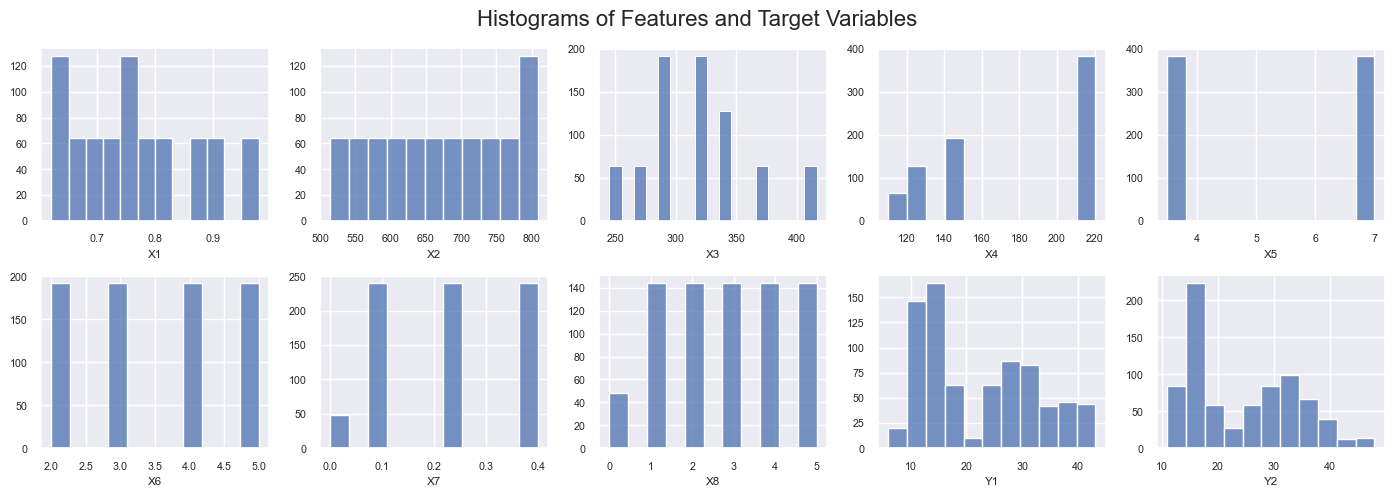

In [74]:
# Histograms of features and target variables

fig, axes = plt.subplots(2, 5, figsize=(14,5))

for i, ax in enumerate(axes.flatten()):
    column = energy_eff_df.columns[i]
    sns.histplot(data=energy_eff_df, x=column, ax=ax, kde=False)
    ax.set_ylabel("") 
fig.suptitle("Histograms of Features and Target Variables", fontsize=16)
plt.tight_layout()
plt.show()

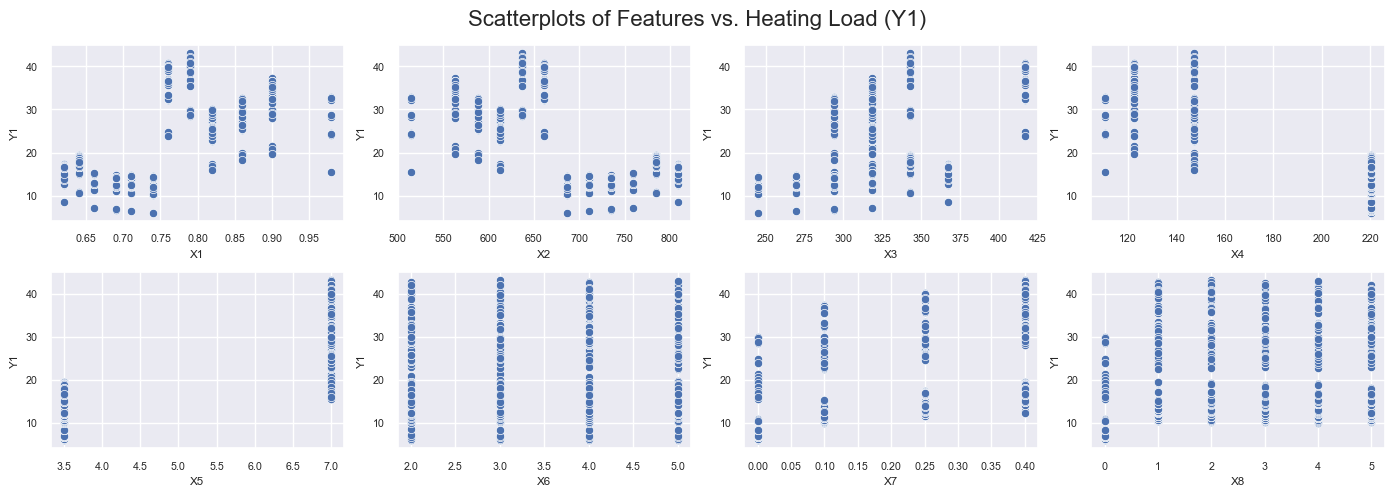

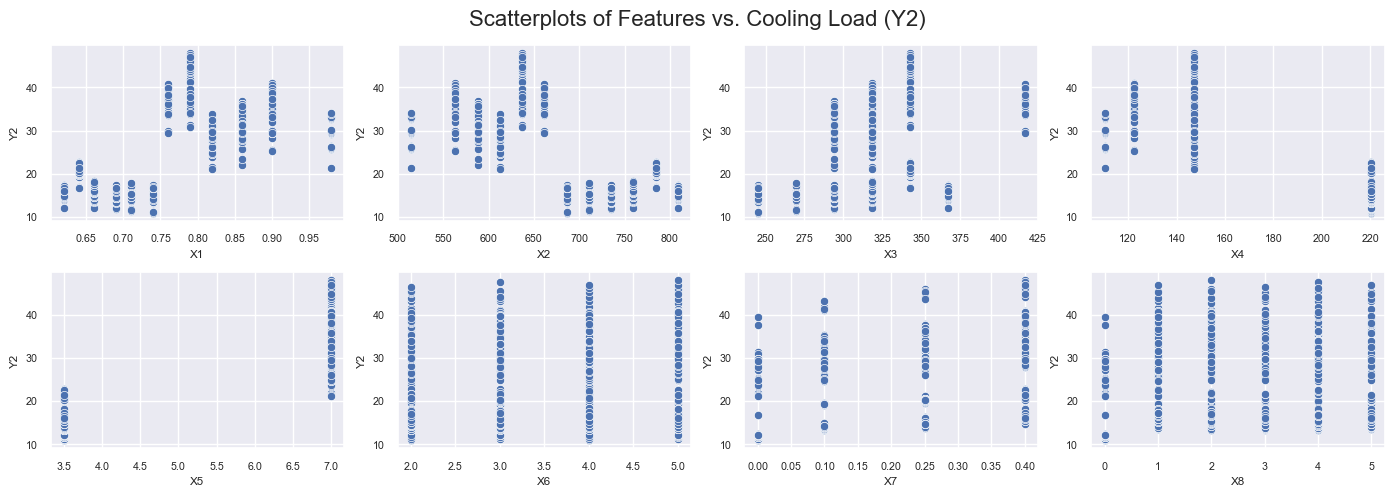

In [75]:
# Scatter plots of features with respect to Heating Load (Y1)

fig, axes = plt.subplots(2, 4, figsize=(14,5))

for i, ax in enumerate(axes.flatten()):
    column = energy_eff_X.columns[i]
    sns.scatterplot(data=energy_eff_df, x=column, y="Y1", ax=ax)
fig.suptitle("Scatterplots of Features vs. Heating Load (Y1)", fontsize=16)
plt.tight_layout()
plt.show()

# Scatter Plots of features with respect to Cooling Load (Y2)

fig, axes = plt.subplots(2, 4, figsize=(14,5))

for i, ax in enumerate(axes.flatten()):
    column = energy_eff_X.columns[i]
    sns.scatterplot(data=energy_eff_df, x=column, y="Y2", ax=ax)
fig.suptitle("Scatterplots of Features vs. Cooling Load (Y2)",fontsize=16)
plt.tight_layout()
plt.show()


      X1    X2    X3    X4    X5    X6    X7    X8    Y1    Y2
X1  1.00 -0.99 -0.20 -0.87  0.83  0.00 -0.00 -0.00  0.62  0.63
X2 -0.99  1.00  0.20  0.88 -0.86 -0.00  0.00  0.00 -0.66 -0.67
X3 -0.20  0.20  1.00 -0.29  0.28 -0.00 -0.00  0.00  0.46  0.43
X4 -0.87  0.88 -0.29  1.00 -0.97 -0.00 -0.00 -0.00 -0.86 -0.86
X5  0.83 -0.86  0.28 -0.97  1.00  0.00  0.00 -0.00  0.89  0.90
X6  0.00 -0.00 -0.00 -0.00  0.00  1.00 -0.00 -0.00 -0.00  0.01
X7 -0.00  0.00 -0.00 -0.00  0.00 -0.00  1.00  0.21  0.27  0.21
X8 -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.21  1.00  0.09  0.05
Y1  0.62 -0.66  0.46 -0.86  0.89 -0.00  0.27  0.09  1.00  0.98
Y2  0.63 -0.67  0.43 -0.86  0.90  0.01  0.21  0.05  0.98  1.00


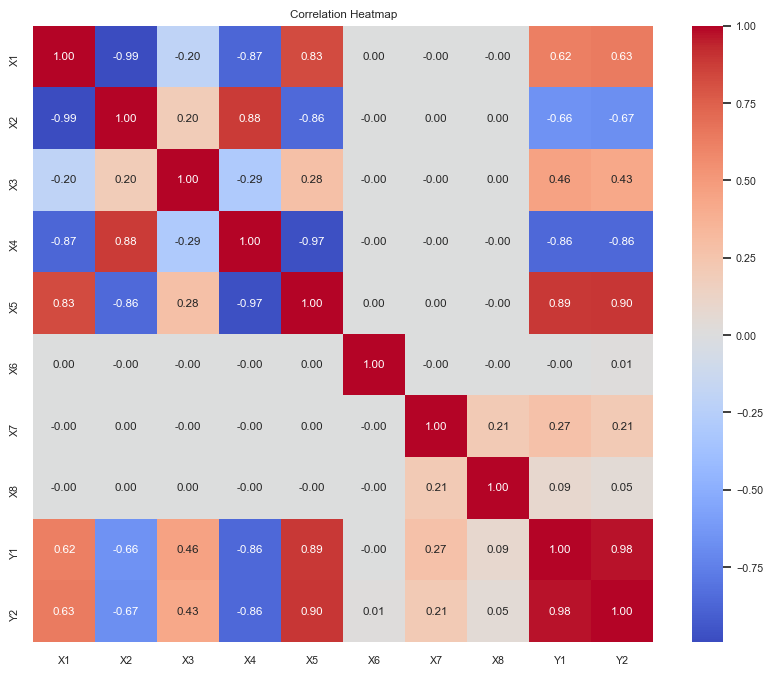

In [76]:
# Correlation Heatmap of features and target variables

print(energy_eff_df.corr().round(2)) 
sns.set(font_scale=0.7)
plt.figure(figsize=(10, 8))
sns.heatmap(energy_eff_df.corr(), cmap="coolwarm", annot=True, fmt=".2f") 
plt.title('Correlation Heatmap')
plt.show() 

In [77]:
# Check column names of features and targets

energy_eff_X_columns = energy_eff_X.columns
energy_eff_y_columns = energy_eff_y.columns
print(f"Features:{energy_eff_X_columns}")
print(f"Targets: {energy_eff_y_columns}")

# Extract only the target variable Y1 (Cooling Load)

energy_eff_y = energy_eff_y["Y1"]

Features:Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')
Targets: Index(['Y1', 'Y2'], dtype='object')


In [78]:
# Split the data into training, validation, and test sets

x_train, x_combine, y_train, y_combine = train_test_split(energy_eff_X, energy_eff_y, test_size=0.4, random_state=69)
x_val, x_test, y_val, y_test = train_test_split(x_combine, y_combine, test_size=0.5, random_state=69)

print(f"Training X Set: {x_train.shape}")
print(f"Training Y Set: {y_train.shape}")
print(f"Validation X Set: {x_val.shape}")
print(f"Validation Y Set: {y_val.shape}")
print(f"Test X Set: {x_test.shape}")
print(f"Test Y Set: {y_test.shape}")

Training X Set: (460, 8)
Training Y Set: (460,)
Validation X Set: (154, 8)
Validation Y Set: (154,)
Test X Set: (154, 8)
Test Y Set: (154,)


In [79]:
# Train a Ridge Regression model with different alpha values

alpha = np.array([1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 10, 100])

# Find the best alpha value for the Ridge Regression model

best_alpha_1 = None
best_model_1 = None
best_accuracy_1 = 0

for a in alpha:
    pipeline = Pipeline([
        ("scalar", StandardScaler()), ("model", Ridge(a))
        ]).fit(x_train, y_train)
    
    val_accuracy = pipeline.score(x_val, y_val)
    train_accuracy = pipeline.score(x_train, y_train)
    
    print(f"Alpha: {a}")
    print(f"  Validation Accuracy (R2): {val_accuracy:.5f}, Training Accuracy (R2): {train_accuracy:.5f}")
    
    if val_accuracy > best_accuracy_1:
    
        best_accuracy_1 = val_accuracy
        best_alpha_1 = a
        best_model_1 = pipeline

Alpha: 0.0001
  Validation Accuracy (R2): 0.92280, Training Accuracy (R2): 0.90912
Alpha: 0.001
  Validation Accuracy (R2): 0.92280, Training Accuracy (R2): 0.90912
Alpha: 0.01
  Validation Accuracy (R2): 0.92279, Training Accuracy (R2): 0.90912
Alpha: 0.05
  Validation Accuracy (R2): 0.92278, Training Accuracy (R2): 0.90912
Alpha: 0.1
  Validation Accuracy (R2): 0.92275, Training Accuracy (R2): 0.90912
Alpha: 0.5
  Validation Accuracy (R2): 0.92260, Training Accuracy (R2): 0.90906
Alpha: 1.0
  Validation Accuracy (R2): 0.92247, Training Accuracy (R2): 0.90894
Alpha: 10.0
  Validation Accuracy (R2): 0.92203, Training Accuracy (R2): 0.90547
Alpha: 100.0
  Validation Accuracy (R2): 0.90989, Training Accuracy (R2): 0.87629


<mark> What is the best model’s coefficients, intercept, and its training, validation, and test accuracy? </mark>

In [80]:
# Extract train and test accuracy of the best model

train_accuracy_1 = best_model_1.score(x_train, y_train)
test_accuracy_1 = best_model_1.score(x_test, y_test)

# Extract predictions of the best model

y_train_pred_1 = best_model_1.predict(x_train)
y_val_pred_1 = best_model_1.predict(x_val)
y_test_pred_1 = best_model_1.predict(x_test)

# Extract the best model's coefficients and intercept

coefficients_1 = best_model_1.named_steps["model"].coef_
intercept_1 = best_model_1.named_steps["model"].intercept_

print(f"Best alpha: {best_alpha_1}")
print(f"Coefficients: \n{coefficients_1}")
print(f"Intercept: {intercept_1}")
print("")
print(f"Validation Accuracy (R2): {best_accuracy_1:.5f}")
print(f"Train Accuracy (R2): {train_accuracy_1:.5f}")
print(f"Test Accuracy (R2): {test_accuracy_1:.5f}")

Best alpha: 0.0001
Coefficients: 
[-6.24646773 -3.16512913  0.77505923 -3.51364696  7.78117322 -0.1135038
  2.72037549  0.52398788]
Intercept: 22.539934782608697

Validation Accuracy (R2): 0.92280
Train Accuracy (R2): 0.90912
Test Accuracy (R2): 0.92568


<mark> What are the top 5 features among X1 to X8? </mark>

In [81]:
# Rank the features based on their coefficients

abs_coefficients_1 = abs(coefficients_1)
feature_description = energy_eff_variables[["name", "description"]]
coefficients_rank_1 = pd.DataFrame({"name": x_train.columns, "abs coefficients": abs_coefficients_1, "coefficients": coefficients_1})
coefficients_rank_1 = coefficients_rank_1.merge(feature_description, on="name")
coefficients_rank_1 = coefficients_rank_1.sort_values(by="abs coefficients", ascending=False)
coefficients_rank_1 = coefficients_rank_1.reset_index(drop=True)
coefficients_rank_1 = coefficients_rank_1.round({'abs coefficients': 3, 'coefficients': 3})
display(coefficients_rank_1)

,name,abs coefficients,coefficients,description
0,X5,7.781,7.781,Overall Height
1,X1,6.246,-6.246,Relative Compactness
2,X4,3.514,-3.514,Roof Area
3,X2,3.165,-3.165,Surface Area
4,X7,2.720,2.720,Glazing Area
5,X3,0.775,0.775,Wall Area
6,X8,0.524,0.524,Glazing Area Distribution
7,X6,0.114,-0.114,Orientation


In [82]:
# Extract the top 5 features with the highest coefficients

coefficients_top5 = coefficients_rank_1[:5]
coefficients_top5_list = list(coefficients_top5["name"])
display(coefficients_top5)
print(coefficients_top5_list)

,name,abs coefficients,coefficients,description
0,X5,7.781,7.781,Overall Height
1,X1,6.246,-6.246,Relative Compactness
2,X4,3.514,-3.514,Roof Area
3,X2,3.165,-3.165,Surface Area
4,X7,2.720,2.720,Glazing Area


['X5', 'X1', 'X4', 'X2', 'X7']


<mark> If you repeat the procedure above using only the 5 top features, what are the results? </mark>

In [83]:
# Extract the top 5 features from the training, validation, and test sets

x_train_top5 = x_train[coefficients_top5_list]
x_val_top5 = x_val[coefficients_top5_list]
x_test_top5 = x_test[coefficients_top5_list]

print(f"Training X Set: {x_train_top5.shape}")
print(f"Training Y Set: {y_train.shape}")
print(f"Validation X Set: {x_val_top5.shape}")
print(f"Validation Y Set: {y_val.shape}")
print(f"Test X Set: {x_test_top5.shape}")
print(f"Test Y Set: {y_test.shape}")

Training X Set: (460, 5)
Training Y Set: (460,)
Validation X Set: (154, 5)
Validation Y Set: (154,)
Test X Set: (154, 5)
Test Y Set: (154,)


In [84]:
# Train a Ridge Regression model with different alpha values using the top 5 features

alpha = np.array([1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 10, 100])

# Find the best alpha value for the Ridge Regression model using the top 5 features

best_alpha_2 = None
best_model_2 = None
best_accuracy_2 = 0

for a in alpha:
    pipeline = Pipeline([
        ("scalar", StandardScaler()), ("model", Ridge(a))
        ]).fit(x_train_top5, y_train)
    
    val_accuracy = pipeline.score(x_val_top5, y_val)
    train_accuracy = pipeline.score(x_train_top5, y_train)
    
    print(f"Alpha: {a}")
    print(f"  Validation Accuracy (R2): {val_accuracy:.3f}, Training Accuracy (R2): {train_accuracy:.3f}")
    
    if val_accuracy > best_accuracy_2:
        best_accuracy_2 = val_accuracy
        best_alpha_2 = a
        best_model_2 = pipeline

Alpha: 0.0001
  Validation Accuracy (R2): 0.927, Training Accuracy (R2): 0.906
Alpha: 0.001
  Validation Accuracy (R2): 0.927, Training Accuracy (R2): 0.906
Alpha: 0.01
  Validation Accuracy (R2): 0.927, Training Accuracy (R2): 0.906
Alpha: 0.05
  Validation Accuracy (R2): 0.927, Training Accuracy (R2): 0.906
Alpha: 0.1
  Validation Accuracy (R2): 0.927, Training Accuracy (R2): 0.906
Alpha: 0.5
  Validation Accuracy (R2): 0.926, Training Accuracy (R2): 0.906
Alpha: 1.0
  Validation Accuracy (R2): 0.926, Training Accuracy (R2): 0.906
Alpha: 10.0
  Validation Accuracy (R2): 0.927, Training Accuracy (R2): 0.904
Alpha: 100.0
  Validation Accuracy (R2): 0.880, Training Accuracy (R2): 0.853


In [85]:
# Extract train and test accuracy of the best model

train_accuracy_2 = best_model_2.score(x_train_top5, y_train)
test_accuracy_2 = best_model_2.score(x_test_top5, y_test)

# Extract predictions of the best model

y_train_pred_2 = best_model_2.predict(x_train_top5) 
y_val_pred_2 = best_model_2.predict(x_val_top5)
y_test_pred_2 = best_model_2.predict(x_test_top5)

# Extract the best model's coefficients and intercept

coefficients_2 = best_model_2.named_steps["model"].coef_
intercept_2 = best_model_2.named_steps["model"].intercept_
print(f"Best alpha: {best_alpha_2}")
print(f"Coefficients: \n{coefficients_2}")
print(f"Intercept: {intercept_2}")
print("")
print(f"Validation Accuracy (R2): {best_accuracy_2:.3f}")
print(f"Train Accuracy (R2): {train_accuracy_2:.3f}")
print(f"Test Accuracy (R2): {test_accuracy_2:.3f}")

Best alpha: 10.0
Coefficients: 
[ 7.71068437 -3.28294732 -4.67906309  0.91757006  2.76335503]
Intercept: 22.539934782608697

Validation Accuracy (R2): 0.927
Train Accuracy (R2): 0.904
Test Accuracy (R2): 0.925


In [86]:
# Rank the features based on their coefficients

abs_coefficients_2 = abs(coefficients_2)
feature_description = energy_eff_variables[["name", "description"]]
coefficients_rank_2 = pd.DataFrame({"name": x_train_top5.columns, "abs coefficients": abs_coefficients_2, "coefficients": coefficients_2})
coefficients_rank_2 = coefficients_rank_2.merge(feature_description, on="name")
coefficients_rank_2 = coefficients_rank_2.sort_values(by="abs coefficients", ascending=False)
coefficients_rank_2 = coefficients_rank_2.reset_index(drop=True)
coefficients_rank_2 = coefficients_rank_2.round({'abs coefficients': 3, 'coefficients': 3})
display(coefficients_rank_2)

,name,abs coefficients,coefficients,description
0,X5,7.711,7.711,Overall Height
1,X4,4.679,-4.679,Roof Area
2,X1,3.283,-3.283,Relative Compactness
3,X7,2.763,2.763,Glazing Area
4,X2,0.918,0.918,Surface Area


In [87]:
# Train a Ridge Regression model with the old alpha value using the top 5 features
old_alpha = 1e-4
old_model = Pipeline([
        ("scalar", StandardScaler()), ("model", Ridge(a))
        ]).fit(x_train_top5, y_train)

# Extract predictions of the old model using top 5 features

y_train_pred_3 = old_model.predict(x_train_top5)
y_val_pred_3 = old_model.predict(x_val_top5)
y_test_pred_3 = old_model.predict(x_test_top5)

# Extract train and test accuracy of the old model using top 5 features

val_accuracy_3 = old_model.score(x_val_top5, y_val)
train_accuracy_3 = old_model.score(x_train_top5, y_train)
test_accuracy_3 = old_model.score(x_test_top5, y_test)

# Extract the old model's coefficients and intercept using top 5 features

coefficients_3 = old_model.named_steps["model"].coef_
intercept_3 = old_model.named_steps["model"].intercept_

print(f"Old alpha: {old_alpha}")
print(f"Coefficients: \n{coefficients_3}")
print(f"Intercept: {intercept_3}")
print("")
print(f"Validation Accuracy (R2): {val_accuracy_3:.3f}")
print(f"Train Accuracy (R2): {train_accuracy_3:.3f}")
print(f"Test Accuracy (R2): {test_accuracy_3:.3f}")

Old alpha: 0.0001
Coefficients: 
[ 4.98076383 -0.88268814 -3.78256338  0.12516147  2.26360299]
Intercept: 22.539934782608693

Validation Accuracy (R2): 0.880
Train Accuracy (R2): 0.853
Test Accuracy (R2): 0.876


In [88]:
# Rank the features based on their coefficients

abs_coefficients_3 = abs(coefficients_3)
feature_description = energy_eff_variables[["name", "description"]]
coefficients_rank_3 = pd.DataFrame({"name": x_train_top5.columns, "abs coefficients": abs_coefficients_3, "coefficients": coefficients_3})
coefficients_rank_3 = coefficients_rank_3.merge(feature_description, on="name")
coefficients_rank_3 = coefficients_rank_3.sort_values(by="abs coefficients", ascending=False)
coefficients_rank_3 = coefficients_rank_3.reset_index(drop=True)
coefficients_rank_3 = coefficients_rank_3.round({'abs coefficients': 3, 'coefficients': 3})
display(coefficients_rank_3)

,name,abs coefficients,coefficients,description
0,X5,4.981,4.981,Overall Height
1,X4,3.783,-3.783,Roof Area
2,X7,2.264,2.264,Glazing Area
3,X1,0.883,-0.883,Relative Compactness
4,X2,0.125,0.125,Surface Area


<mark> What insights did you gain? </mark>

In [89]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluate the models
mse_train_1, mae_train_1, r2_train_1 = evaluate_model(y_train, y_train_pred_1)
mse_val_1, mae_val_1, r2_val_1 = evaluate_model(y_val, y_val_pred_1)
mse_test_1, mae_test_1, r2_test_1 = evaluate_model(y_test, y_test_pred_1)

mse_train_2, mae_train_2, r2_train_2 = evaluate_model(y_train, y_train_pred_2)
mse_val_2, mae_val_2, r2_val_2 = evaluate_model(y_val, y_val_pred_2)
mse_test_2, mae_test_2, r2_test_2 = evaluate_model(y_test, y_test_pred_2)

mse_train_3, mae_train_3, r2_train_3 = evaluate_model(y_train, y_train_pred_3)
mse_val_3, mae_val_3, r2_val_3 = evaluate_model(y_val, y_val_pred_3)
mse_test_3, mae_test_3, r2_test_3 = evaluate_model(y_test, y_test_pred_3)


In [90]:
# Create a dictionary with the evaluation metrics
model_data = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Description': ['best model for all features', 'best model for top 5 features', 'old model for top 5 features'],
    'Alpha': [best_alpha_1, best_alpha_2, old_alpha],
    'Coefficients': [coefficients_1, coefficients_2, coefficients_3]}
evaluation_data = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Description': ['best model for all features', 'best model for top 5 features', 'old model for top 5 features'],
    'Train R2': [r2_train_1, r2_train_2, r2_train_3],
    'Train MSE': [mse_train_1, mse_train_2, mse_train_3],
    'Train MAE': [mae_train_1, mae_train_2, mae_train_3],
    'Validation R2': [r2_val_1, r2_val_2, r2_val_3],
    'Validation MSE': [mse_val_1, mse_val_2, mse_val_3],
    'Validation MAE': [mae_val_1, mae_val_2, mae_val_3],
    'Test R2': [r2_test_1, r2_test_2, r2_test_3],
    'Test MSE': [mse_test_1, mse_test_2, mse_test_3],
    'Test MAE': [mae_test_1, mae_test_2, mae_test_3]
}

# Create dataframes from the dictionaries
model_df = pd.DataFrame(model_data)
evaluation_df = pd.DataFrame(evaluation_data)

# Round multiple columns
pd.set_option('display.max_colwidth', None)
model_df['Coefficients'] = model_df['Coefficients'].apply(lambda x: [round(i, 3) for i in x])
evaluation_df = evaluation_df.round({'Train R2': 3, 'Train MSE': 3, 'Train MAE': 3,
                                     'Validation R2': 3, 'Validation MSE': 3, 'Validation MAE': 3,
                                     'Test R2': 3, 'Test MSE': 3, 'Test MAE': 3})

print("Model MetaData")
display(model_df)
print("Evaluation Metrics")
display(evaluation_df)


Model MetaData


,Model,Description,Alpha,Coefficients
0,Model 1,best model for all features,0.0001,"[-6.246, -3.165, 0.775, -3.514, 7.781, -0.114, 2.72, 0.524]"
1,Model 2,best model for top 5 features,10.0000,"[7.711, -3.283, -4.679, 0.918, 2.763]"
2,Model 3,old model for top 5 features,0.0001,"[4.981, -0.883, -3.783, 0.125, 2.264]"


Evaluation Metrics


,Model,Description,Train R2,Train MSE,Train MAE,Validation R2,Validation MSE,Validation MAE,Test R2,Test MSE,Test MAE
0,Model 1,best model for all features,0.909,9.158,2.161,0.923,8.204,2.092,0.926,7.389,2.025
1,Model 2,best model for top 5 features,0.904,9.653,2.160,0.927,7.802,1.962,0.925,7.456,1.939
2,Model 3,old model for top 5 features,0.853,14.840,2.881,0.880,12.715,2.765,0.876,12.323,2.635


In [91]:
print("Coefficients Rank for Model 1")
display(coefficients_rank_1)
print("Coefficients Rank for Model 2")
display(coefficients_rank_2)
print("Coefficients Rank for Model 3")
display(coefficients_rank_3)

Coefficients Rank for Model 1


,name,abs coefficients,coefficients,description
0,X5,7.781,7.781,Overall Height
1,X1,6.246,-6.246,Relative Compactness
2,X4,3.514,-3.514,Roof Area
3,X2,3.165,-3.165,Surface Area
4,X7,2.720,2.720,Glazing Area
5,X3,0.775,0.775,Wall Area
6,X8,0.524,0.524,Glazing Area Distribution
7,X6,0.114,-0.114,Orientation


Coefficients Rank for Model 2


,name,abs coefficients,coefficients,description
0,X5,7.711,7.711,Overall Height
1,X4,4.679,-4.679,Roof Area
2,X1,3.283,-3.283,Relative Compactness
3,X7,2.763,2.763,Glazing Area
4,X2,0.918,0.918,Surface Area


Coefficients Rank for Model 3


,name,abs coefficients,coefficients,description
0,X5,4.981,4.981,Overall Height
1,X4,3.783,-3.783,Roof Area
2,X7,2.264,2.264,Glazing Area
3,X1,0.883,-0.883,Relative Compactness
4,X2,0.125,0.125,Surface Area


## Summary Insights

**Train-Validation-Test Split**
- Train set is used to fit the model parameters
- Validation set is used to tune the model hyperparameters and avoid overfitting
- Test set is used to measure the model accuracy on unseen data

**Ridge Regression Usage**
- Ridge regression uses a regularization parameter (alpha) to prevent overfitting and to reduce the model variance. It adds an L2-norm penalty term to the loss fucntion of the model, reducing coefficient values. This technique is often used if there is a risk of overfitting due to mutlticollinearity. 
- Higher alpha: More regularization VERSUS Lower alpha: Less regularization  
- Heat correlation map: Some features have high correlation and so ridge regression is an appropriate linear regression model to use. 

**Regularization Parameter Tuning**
- Too small alpha: Model overfits training data, high variance VERSUS Too large alpha: Model underfits training data, high bias.
- Alpha tuning was done in cosideration of the validation data. The best alpha was found to be 0.0001.
- The best model was applied on the testing data and a high test accuracy was obtained.
- Test accuracy approximates to validation accuracy AND test accuracy and validation accuracy > training accuracy
    - Regularization was effective. Model can generalize well and avoid overfitting and underfitting

**Ranking Coefficients**
- Model coefficients show how each feature affects the predicted outcome when other features are held constant.
- Most influential features are overall height, relative compactness, roof area, surface area, and glazing, in descending order.
- Overall height and glazing have positive coefficients, meaning that higher values of these factors lead to higher cooling load.
- Relative compactness, roof area, and surface area have negative coefficients, meaning that higher values of these factors lead to lower cooling load.

**Model Metrics Comparision**
- For all models: R2 of the test and validation data > R2 of the train data for all models
    - Models showed good generalization ability
- For all models: R2 of the test data was close to the R2 of the validation data
    - Models had low variance and were not sensitive to the data split
- Model that used the top 5 features outperformed the model that used all features as it had higher R2 and lower MSE and MAE
    - Top 5 features were more relevant for predicting the outcome variable
    - Principle of Parsimony
- When reducing the features, do not use the same regularization parameter that was used for the old model. Try out different values of alpha and choose the one that minimizes the validation error.

**Model Coefficients Comparision**
- When top 10 features were used, surface area has a positive coefficient. 
- When top 5 features, surface area has a negative coefficents. 
- This can happen due to multicollinearity. For example, it can be seen in the correlation heat map that surface area has a high negative correlation (-0.99) with relative compactness.